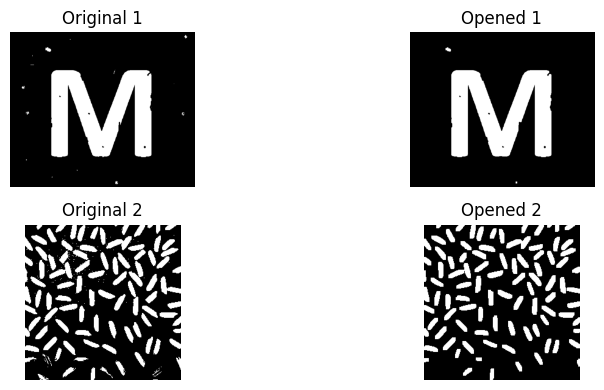

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Folder tujuan
output_folder = r"C:\Users\user\tugas"
os.makedirs(output_folder, exist_ok=True)

# Path input gambar
input_image1 = os.path.join(output_folder, "1.png")
input_image2 = os.path.join(output_folder, "2.png")

# Baca gambar sebagai grayscale
img1 = cv2.imread(input_image1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(input_image2, cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar terbaca
if img1 is None or img2 is None:
    print("Gagal membaca salah satu gambar. Periksa path-nya.")
else:
    # Konversi ke biner
    _, binary1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
    _, binary2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

    # Kernel (structuring element)
    kernel = np.ones((5, 5), np.uint8)

    # Operasi opening (erosi lalu dilasi)
    opened1 = cv2.morphologyEx(binary1, cv2.MORPH_OPEN, kernel)
    opened2 = cv2.morphologyEx(binary2, cv2.MORPH_OPEN, kernel)

    # Simpan hasil
    cv2.imwrite(os.path.join(output_folder, "opened_1.png"), opened1)
    cv2.imwrite(os.path.join(output_folder, "opened_2.png"), opened2)

    # Tampilkan hasil
    plt.figure(figsize=(10, 4))

    plt.subplot(2, 2, 1)
    plt.title("Original 1")
    plt.imshow(binary1, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title("Opened 1")
    plt.imshow(opened1, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title("Original 2")
    plt.imshow(binary2, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title("Opened 2")
    plt.imshow(opened2, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
